<a href="https://colab.research.google.com/github/aaalexlit/big-data-hadoop-spark-edx-course/blob/main/course_1_custom_models/Week4_Wide_and_Deep_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, concatenate, Input
from tensorflow.keras.utils import plot_model

# Build a model with the functional API

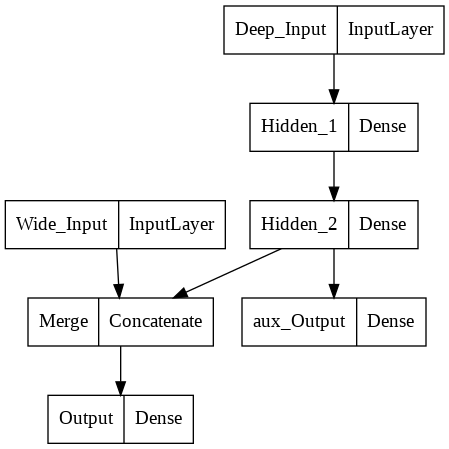

In [6]:
# model inputs
input_wide = Input(shape=[1], name="Wide_Input")
input_deep = Input(shape=[1], name="Deep_Input")

# deep path
hidden_1 = Dense(30, activation="relu", name="Hidden_1")(input_deep)
hidden_2 = Dense(30, activation="relu", name="Hidden_2")(hidden_1)

# merge deep and wide path
concat = concatenate([input_wide, hidden_2], name="Merge")
output = Dense(1, name="Output")(concat)

# additional output from the deep path
aux_output = Dense(1, name="aux_Output")(hidden_2)

# combine inputs and outputs into a model
model = Model(inputs=[input_wide, input_deep], 
							outputs=[output, aux_output])

# plot the model
plot_model(model)

# The same model implemented as a Class

It's required to implement the following methods:
- `__init__`  initialize the instance attributes
- `call` builds the network and returns the output layers

In [7]:
class WideAndDeepModel(Model):
	def __init__(self, units=30, activation='relu', **kwargs):
		super().__init__(**kwargs)
		self.hidden1 = Dense(units, activation=activation)
		self.hidden2 = Dense(units, activation=activation)
		self.main_output_layer = Dense(1)
		self.aux_output_layer = Dense(1)


	def call(self, inputs):
		input_wide, input_deep = inputs
		hidden1_out = self.hidden1(input_deep)
		hidden2_out = self.hidden2(hidden1_out)
		concat = concatenate([input_wide, hidden2_out])
		main_output = self.main_output_layer(concat)
		aux_output = self.aux_output_layer(hidden2_out)
		return main_output, aux_output

In [8]:
model = WideAndDeepModel()